
---

# **SVM Kernels: The "Kernel Trick"**

Support Vector Machines (SVMs) are powerful supervised learning models that aim to find the **optimal hyperplane** that separates different classes in a dataset. This works well for **linearly separable data**, but real-world datasets often aren’t linearly separable. That’s where **kernels** come into play.

## **What Is the Kernel Trick?**

The **kernel trick** is a clever mathematical technique that allows SVMs to operate in a **higher-dimensional space** without ever explicitly computing the coordinates in that space. Instead of transforming the data points manually, a **kernel function** is used to compute the **dot product** of the data points **as if** they were in that higher-dimensional space.

This trick enables the SVM to find a **linear decision boundary in a transformed space**, which corresponds to a **non-linear boundary in the original space**.

---

### **Intuition**

Imagine a dataset in 2D where one class forms a ring around another class—clearly not linearly separable in 2D. A kernel function can **implicitly transform** this 2D data into 3D, where a flat plane *can* separate the two classes. The SVM doesn't need to know the actual coordinates in 3D—just the dot products between the points in that space.

This is the **power** of the kernel trick: complex transformations without complex computations.

---

### **Why Is the Kernel Trick Important?**

* **Handles Non-Linear Separability:** It enables SVMs to learn non-linear decision boundaries in the original input space.
* **Computational Efficiency:** It avoids the expensive computation of mapping to high-dimensional space explicitly.
* **Flexibility:** Different kernel functions (like polynomial, RBF, sigmoid) allow SVMs to adapt to various types of data distributions and structures.
* **Scalability to Infinite Dimensions:** Some kernels (like the RBF/Gaussian kernel) map data into infinite-dimensional spaces — but thanks to the kernel trick, SVMs can still operate efficiently.

---

### **Common Kernel Functions**

| Kernel Name        | Kernel Function Expression               | Use Case Example                                               |
| ------------------ | ---------------------------------------- | -------------------------------------------------------------- |
| Linear             | $K(x, x') = x^\top x'$                   | When data is linearly separable                                |
| Polynomial         | $K(x, x') = (x^\top x' + c)^d$           | Adds flexibility; models curved boundaries                     |
| Radial Basis (RBF) | $K(x, x') = \exp(-\gamma \|x - x'\|^2)$  | Great for most non-linear problems                             |
| Sigmoid            | $K(x, x') = \tanh(\alpha x^\top x' + c)$ | Similar to neural networks (not always positive semi-definite) |

---


| Kernel Type | Description | When to Use | Common Applications |
|---|---|---|---|
| Linear | Straight line separation | Data is linearly separable | Text classification, sentiment analysis |
| Polynomial | Curved line separation | Data has some curvature | Image recognition, bioinformatics |
| RBF | Complex, non-linear separation | Data has complex relationships | Image classification, handwriting recognition |
| Sigmoid | S-shaped curve separation | Approximates neural network activation | Neural networks, some text classification |

## Hands On SVM Kernel Practical Implementation

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [14]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

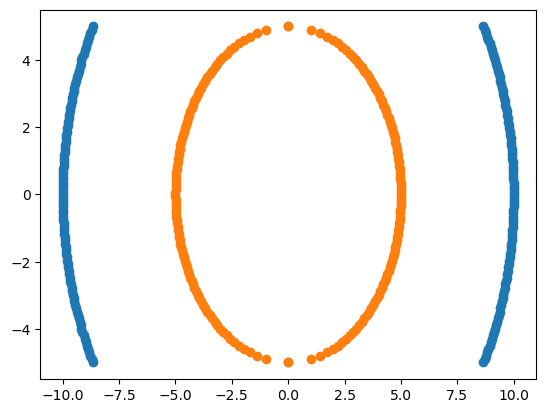

In [15]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [19]:
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [20]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [21]:
## Polynomial Kernel

In [22]:
## Based on the formula find the componenets for the Polynomial kernel

In [23]:
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [24]:
### Independent and Dependent features
X = df[['X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

In [26]:
X_train.head()

,X1_Square,X2_Square,X1*X2
250,24.997449,0.002551,0.252512
63,98.140496,1.859504,13.508984
312,10.651974,14.348026,-12.362637
159,99.079176,0.920824,9.551676
283,13.549638,11.450362,12.455852


In [27]:
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


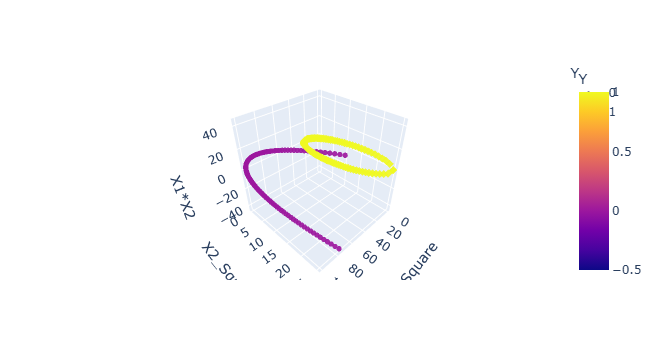

In [29]:
fig = px.scatter_3d(df,
                    x='X1_Square',
                    y='X2_Square',
                    z='X1*X2',
                    color='Y',
                    symbol='Y',  # different marker shapes
                    opacity=0.7)
fig.update_traces(marker=dict(size=3))
fig.show()


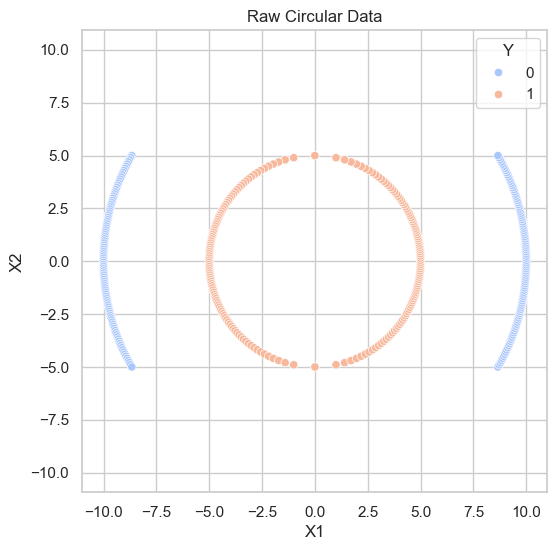



🔍 Training SVM with Linear Kernel
✅ Accuracy: 0.51
📉 Confusion Matrix:
 [[21 31]
 [18 30]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.40      0.46        52
           1       0.49      0.62      0.55        48

    accuracy                           0.51       100
   macro avg       0.52      0.51      0.51       100
weighted avg       0.52      0.51      0.50       100



C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



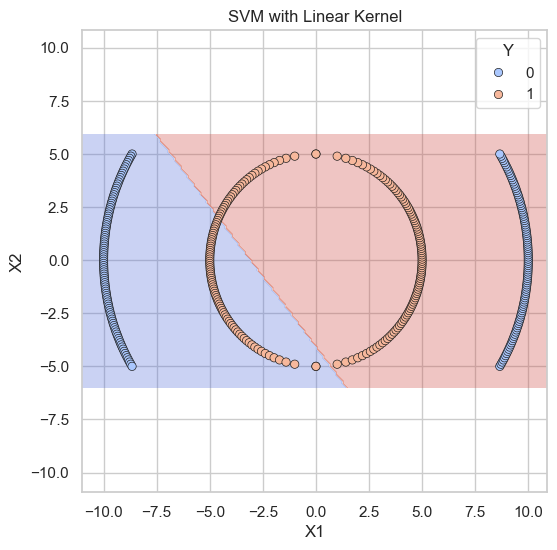



🔍 Training SVM with Polynomial Kernel
✅ Accuracy: 1.0
📉 Confusion Matrix:
 [[52  0]
 [ 0 48]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



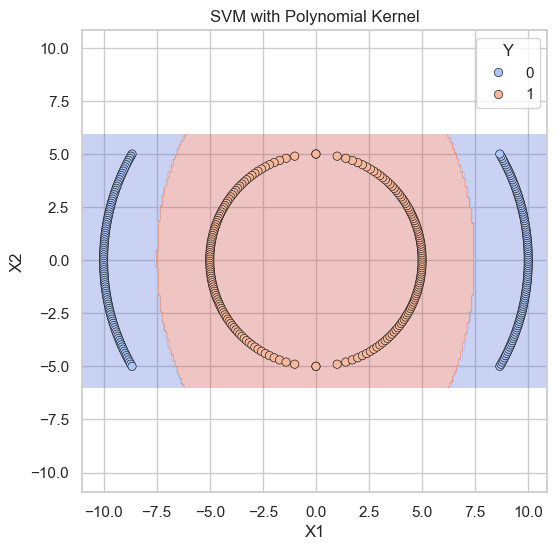



🔍 Training SVM with RBF Kernel
✅ Accuracy: 1.0
📉 Confusion Matrix:
 [[52  0]
 [ 0 48]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        48

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



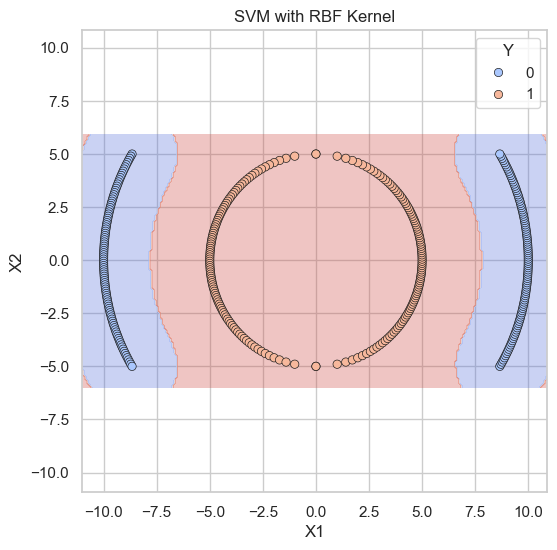



🔍 Training SVM with Sigmoid Kernel
✅ Accuracy: 0.45
📉 Confusion Matrix:
 [[24 28]
 [27 21]]
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.46      0.47        52
           1       0.43      0.44      0.43        48

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.45      0.45      0.45       100



C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



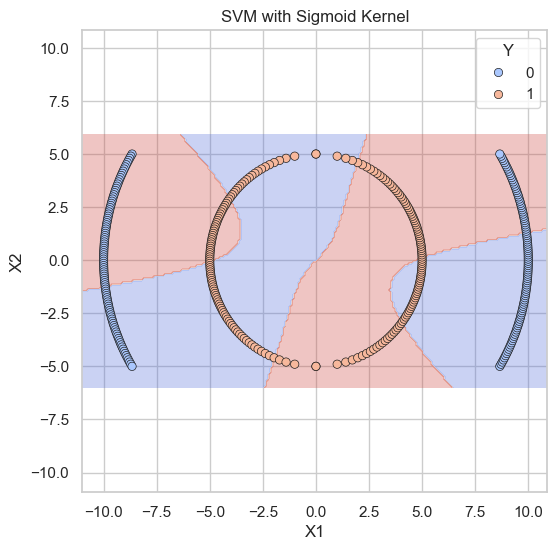

In [30]:
# -------------------------------------------
# 📌 Step 1: Import Libraries
# -------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Optional: For clean plots
sns.set(style="whitegrid")

# -------------------------------------------
# 📌 Step 2: Generate Circular Dataset
# -------------------------------------------

# Circle 1 - radius 10
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

# Circle 2 - radius 5
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

# Combine into DataFrames
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

# Merge both
df = pd.concat([df1, df2], ignore_index=True)

# -------------------------------------------
# 📌 Step 3: Visualize the Raw Data
# -------------------------------------------
plt.figure(figsize=(6, 6))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df, palette='coolwarm')
plt.title("Raw Circular Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.show()

# -------------------------------------------
# 📌 Step 4: Prepare Train/Test Data
# -------------------------------------------
X = df[['X1', 'X2']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

# -------------------------------------------
# 📌 Step 5: Define Plotting Function
# -------------------------------------------
def plot_decision_boundary(clf, X, y, title):
    h = 0.1
    x_min, x_max = X['X1'].min() - 1, X['X1'].max() + 1
    y_min, y_max = X['X2'].min() - 1, X['X2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X['X1'], y=X['X2'], hue=y, palette='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.axis("equal")
    plt.show()

# -------------------------------------------
# 📌 Step 6: Train & Evaluate Each Kernel
# -------------------------------------------

kernels = {
    'Linear': {'kernel': 'linear'},
    'Polynomial': {'kernel': 'poly', 'degree': 3, 'coef0': 1, 'gamma': 'auto'},
    'RBF': {'kernel': 'rbf', 'gamma': 0.5},
    'Sigmoid': {'kernel': 'sigmoid', 'gamma': 0.1, 'coef0': 0.0}
}

for name, params in kernels.items():
    print(f"\n\n========================")
    print(f"🔍 Training SVM with {name} Kernel")
    print(f"========================")
    
    # Train the classifier
    model = SVC(C=1, **params)
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluation
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot
    plot_decision_boundary(model, X, y, f"SVM with {name} Kernel")


| Kernel         | Accuracy | Notes                                                                    |
| -------------- | -------- | ------------------------------------------------------------------------ |
| **Linear**     | 0.51     | Poor performance – SVM struggles with non-linear (circular) data.        |
| **Polynomial** | **1.0**  | Perfect fit – Excellent for circular patterns when degree is sufficient. |
| **RBF**        | **1.0**  | Also perfect – Very good at modeling complex nonlinear boundaries.       |
| **Sigmoid**    | 0.45     | Performs poorly – Often unreliable for general classification.           |


---

## ✅ 📊 Summary of Kernel Results:

| Kernel         | Accuracy | Notes                                                                    |
| -------------- | -------- | ------------------------------------------------------------------------ |
| **Linear**     | 0.51     | Poor performance – SVM struggles with non-linear (circular) data.        |
| **Polynomial** | **1.0**  | Perfect fit – Excellent for circular patterns when degree is sufficient. |
| **RBF**        | **1.0**  | Also perfect – Very good at modeling complex nonlinear boundaries.       |
| **Sigmoid**    | 0.45     | Performs poorly – Often unreliable for general classification.           |

---

## 🔍 Interpretation

### 🔴 **Linear Kernel**

* Only works well when data is **linearly separable**.
* Your dataset has **concentric circles**, which cannot be separated by a straight line.
* That’s why this kernel fails.

### 🔵 **Polynomial Kernel**

* Excellent for **non-linear, symmetrical patterns**.
* Can model circular or parabolic shapes.
* It **learns the boundary** between inner and outer circles correctly.

### 🟣 **RBF (Radial Basis Function) Kernel**

* Very powerful for **complex nonlinear patterns**.
* Uses distances to cluster centers, which is perfect for your data.
* It **fits the circular shape just as well** as the polynomial.

### ⚫ **Sigmoid Kernel**

* Inspired by neural nets (acts like a perceptron).
* Doesn’t work well for your type of data.
* Decision boundary is likely **linear-like or chaotic**.

---

## 📌 Which Kernel is Best?

### ✅ **Based on Accuracy**:

* Polynomial & RBF → Perfect accuracy = **best choices**.
* Choose between them based on speed or interpretability.

### ✅ **Based on Visualization**:

* Plot their decision boundaries using `plot_decision_boundary(model, X, y, title)` — you'll see:

  * **Linear**: Straight, cuts through.
  * **Poly & RBF**: Wraps around classes beautifully.
  * **Sigmoid**: Likely messy or misaligned.

---

### If Interviewer ask what is svm? 

SVM is a classification algorithm that finds the best decision boundary (called a hyperplane) to separate data from different classes. It does this by maximizing the margin between the classes, using the closest data points (called support vectors) to define that boundary.

“In both SVC and SVR, the idea is to find a line or hyperplane that fits the data in the best possible way. In classification (SVC), we separate the data into classes with the widest possible margin. In regression (SVR), we find a line that fits the data while allowing some tolerance (epsilon margin) where small errors are ignored, and only larger deviations affect the model. The points that define this line in both cases are called support vectors.”



| Type | What It Does               | What It Finds         | Role of Margin                  | Support Vectors              |
| ---- | -------------------------- | --------------------- | ------------------------------- | ---------------------------- |
| SVC  | Classifies data            | Separating hyperplane | Maximize margin between classes | Closest points to hyperplane |
| SVR  | Predicts continuous values | Regression line/curve | Tolerance range for errors (ε)  | Points outside ε-tube        |


### If interviewer ask overfitting happens in svm and how we can handle that

Yes, overfitting can happen in SVM, especially when we try to perfectly classify every training point. To avoid that, we use a soft margin, which allows a few misclassifications but leads to a wider, more general margin that performs better on new data. The trade-off is controlled by the C parameter — a small C allows more errors and helps reduce overfitting, while a large C tries to force a perfect fit, which may overfit.